In [3]:
import numpy as np
from scipy.integrate import quad
from scipy import constants
import matplotlib.pyplot as plt
from scipy.optimize import newton as nwt

def Yukawa(r, alfa):
    return (k / r) * np.exp(-alfa * r)

def integral(r, E, b, alfa):
    return 1 / (r ** 2 * np.sqrt(1 - Yukawa(r, alfa) / E - b ** 2 / r ** 2))

def r_min_esperado(E, b):
    momento_angular = 2 * E * m * b
    coeficientes = [E ** 2, -k, - (momento_angular ** 2) / (2 * m)]
    raices = np.roots(coeficientes)

    raices_reales = [r.real for r in raices if r.imag == 0 and r.real > 0]
    r_esperado = min(raices_reales)
    return r_esperado

def r_min(E, b, alfa):
    momento_angular = 2 * E * m * b

    def ecuacion(r):
        return E * r ** 2 - k * r * np.exp(-alfa * r) - momento_angular ** 2 / (2 * m)
    
    posible = r_min_esperado(E, b)
    return nwt(ecuacion, posible)

# def dispersión(E, b, alfa):
#     r_min = r_min(E, b, alfa)
#     theta_max, error = quad(lambda r: integral(r, E, b, alfa), r_min, np.inf)
#     Chi = np.pi - 2 * theta_max * b
#     return Chi

def dispersión(E, b, alfa):
    # Change the local variable name to avoid shadowing the function
    r_min_value = r_min(E, b, alfa)  
    theta_max, error = quad(lambda r: integral(r, E, b, alfa), r_min_value, np.inf)
    Chi = np.pi - 2 * theta_max * b
    return Chi

In [4]:
# Parámetros iniciales
E = 1
k = 1
m = 1
b = np.linspace(0.1, 6, 1000)

# Calcular y graficar ángulos de dispersión con distintos valores de alfa
for i in range(0, 10, 2):
    angulos = np.empty(1000)
    for j in range(1000):
        angulos[j] = dispersión(E, b[j], i)
    plt.plot(b, angulos, label=fr'$\alpha$={i}')
    plt.legend()

plt.xlabel(r"Parámetro de impacto b (m)", fontsize=18)
plt.ylabel(r"$\chi$ (rad)", fontsize=18)
plt.legend(loc='best', fontsize=14)
plt.grid(which='major', color='gray', linestyle='-', linewidth=0.5)
plt.grid(which='minor', color='gray', linestyle=':', linewidth=0.5)
plt.minorticks_on()
plt.show()

UnboundLocalError: local variable 'r_min' referenced before assignment

/tmp/ipykernel_6285/3975665218.py:13: RuntimeWarning: invalid value encountered in sqrt
  return 1 / np.sqrt(1 - Yukawa(u, alfa) / E - b ** 2 * u ** 2)
/tmp/ipykernel_6285/3975665218.py:40: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  theta_max, error = quad(lambda u: integral(u, E, b, alfa), 0, u_m)


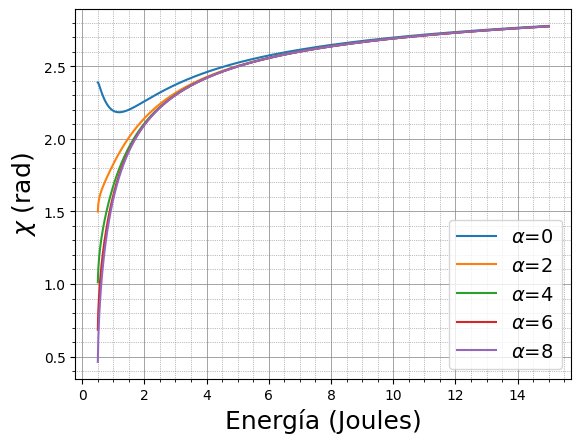

In [5]:
# Graficar ángulos de dispersión con respecto a la energía
b = 0.4
E = np.linspace(0.1, 15, 1000)

for i in range(0, 10, 2):
    angulos = np.empty(1000)
    for j in range(1000):
        angulos[j] = dispersión(E[j], b, i)
    plt.plot(E, angulos, label=fr'$\alpha$={i}')
    plt.legend()

plt.xlabel("Energía (Joules)", fontsize=18)
plt.ylabel(r"$\chi$ (rad)", fontsize=18)
plt.legend(loc='best', fontsize=14)
plt.grid(which='major', color='gray', linestyle='-', linewidth=0.5)
plt.grid(which='minor', color='gray', linestyle=':', linewidth=0.5)
plt.minorticks_on()
plt.show()

/shared-libs/python3.9/py/lib/python3.9/site-packages/numpy/lib/function_base.py:1239: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/shared-libs/python3.9/py/lib/python3.9/site-packages/numpy/lib/function_base.py:1239: RuntimeWarning: invalid value encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/shared-libs/python3.9/py/lib/python3.9/site-packages/numpy/lib/function_base.py:1240: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
/shared-libs/python3.9/py/lib/python3.9/site-packages/numpy/lib/function_base.py:1240: RuntimeWarning: invalid value encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
/shared-libs/python3.9/py/lib/python3.9/site-packages/numpy/lib/function_base.py:1241: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
/shared-libs/python3.9/py/lib/python3.9/site-packages/numpy/lib/function_base.py:1241: RuntimeWarning: invalid value encountered in divide
 

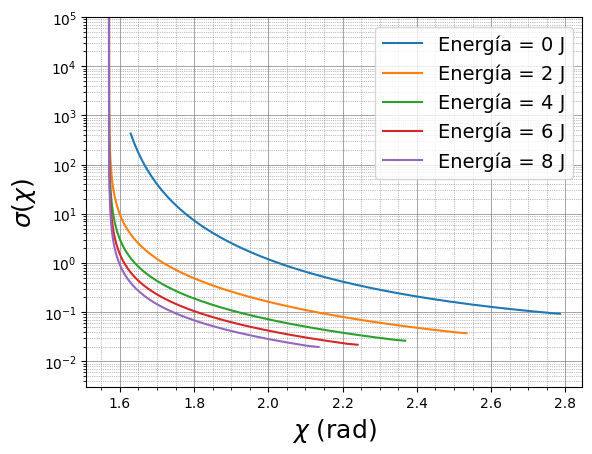

In [6]:
# Calcular sección transversal diferencial con distintos valores de alfa
m = 1
k = 1
E = 1
valores_b = np.linspace(0.1, 5, 1000)

for i in range(0, 10, 2):
    chi = np.empty(1000)
    for j in range(1000):
        chi[j] = dispersión(E, valores_b[j], i)
    db_dX = np.gradient(valores_b, chi)
    sigma = (valores_b / np.sin(chi)) * np.abs(db_dX)
    plt.plot(chi, sigma, label=f'Energía = {i} J')
    plt.legend()

plt.yscale('log')
plt.xlabel(r'$\chi$ (rad)', fontsize=18)
plt.ylabel(r'$\sigma(\chi)$', fontsize=18)
plt.ylim(0, 10e4)
plt.legend(loc='best', fontsize=14)
plt.grid(True)
plt.grid(which='major', color='gray', linestyle='-', linewidth=0.5)
plt.grid(which='minor', color='gray', linestyle=':', linewidth=0.5)
plt.minorticks_on()
plt.show()

/tmp/ipykernel_6285/1330577270.py:19: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 10e5)


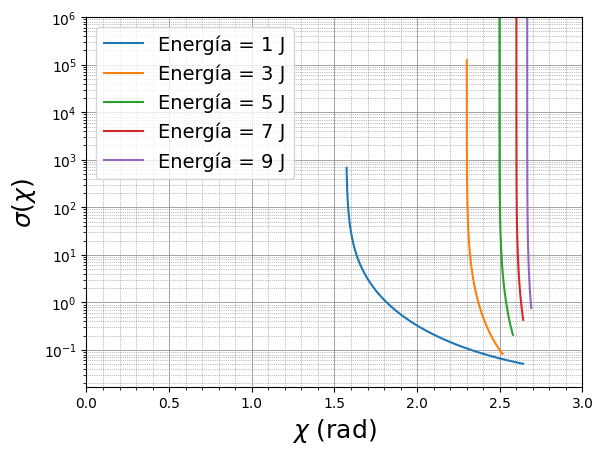

In [8]:
# Calcular sección transversal diferencial con distintas energías
m = 1
k = 1
alfa = 1
valores_b = np.linspace(0.1, 3, 1000)

for i in range(1, 10, 2):
    chi = np.empty(1000)
    for j in range(1000):
        chi[j] = dispersión(i, valores_b[j], alfa)
    db_dX = np.gradient(valores_b, chi)
    sigma = (valores_b / np.sin(chi)) * np.abs(db_dX)
    plt.plot(chi, sigma, label=f'Energía = {i} J')
    plt.legend()

plt.yscale('log')
plt.xlabel(r'$\chi$ (rad)', fontsize=18)
plt.ylabel(r'$\sigma(\chi)$', fontsize=18)
plt.ylim(0, 10e5)
plt.xlim(0, 3)
plt.legend(loc='best', fontsize=14)
plt.grid(True)
plt.grid(which='major', color='gray', linestyle='-', linewidth=0.5)
plt.grid(which='minor', color='gray', linestyle=':', linewidth=0.5)
plt.minorticks_on()
plt.show()

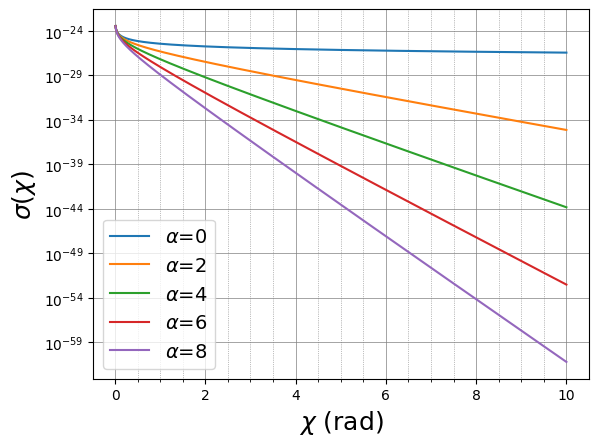

In [7]:
# Distancias
r = np.linspace(0.01, 10, 5000)

# Potencial de Coulomb
V_C = 1 / r

# Definir los parámetros conocidos
q1 = constants.e * 79  # Masa que esta en el foco (Nucleo de oro)
q2 = constants.e * 2   # Particula Alpha
m = 6.64424e-27       # Masa de la particula alpha
k = (q1*q2)/(4*np.pi*constants.epsilon_0)  # Constante del potencial

plt.plot(r, (k / r) , label=fr'$\alpha$=0')
plt.plot(r, (k / r) * np.exp(-2 * r), label=fr'$\alpha$=2')
plt.plot(r, (k / r) * np.exp(-4 * r), label=fr'$\alpha$=4')
plt.plot(r, (k / r) * np.exp(-6 * r), label=fr'$\alpha$=6')
plt.plot(r, (k / r) * np.exp(-8 * r), label=fr'$\alpha$=8')
    


# Graficar
plt.yscale('log')
plt.xlabel(r'$\chi$ (rad)', fontsize=18)
plt.ylabel(r'$\sigma(\chi)$', fontsize=18)
# plt.title('Comparación entre el Potencial de Coulomb y el Potencial de Yukawa', fontsize=18)
plt.legend(loc='best', fontsize=14)
plt.grid(True)
# Configuring a GeoGebra-like mesh
plt.grid(which='major', color='gray', linestyle='-', linewidth=0.5)  # Major grid lines
plt.grid(which='minor', color='gray', linestyle=':', linewidth=0.5)  # Minor grid lines
# Adding minor ticks to create a finer grid
plt.minorticks_on()
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ff8ad349-14ae-4105-b717-f9feed4f0ee2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>